# [A] Numpy 

1) 모양이 (20,)인 4개의 1차원 배열 a,b,c,d를 만드시오  
a : 처음 15개는 3, 나머지 5개는 4인 배열  
b : 정수 집합 {1, 2}에서 랜덤하게 뽑은 난수 배열(단, seed는 1로 설정)  
c : 정수 집합 {1, 2, ...,, 99, 100}에서 랜덤하게 뽑은 난수 배열(단, seed는 2로 설정)  
d : [0, 1) 구간에서 뽑은 난수 배열(단, seed는 3으로 설정)에 대하여 100을 곱한 후 
소수점 이하는 버리고 정수 부분만 취하여 1을 더한 배열  

In [105]:
import numpy as np

In [108]:
a = np.full(15,3) 
a2 = np.full(5,4)
a= np.concatenate([a,a2])
a

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4])

In [109]:
np.random.seed(1)
b = np.random.randint(1,3,size=(20,))
b

array([2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1])

In [110]:
np.random.seed(2)
c = np.random.randint(1,101,size=(20,))
c

array([41, 16, 73, 23, 44, 83, 76,  8, 35, 50, 96, 76, 86, 48, 64, 32, 91,
       21, 38, 40])

In [111]:
np.random.seed(3)
d=np.random.random(20,)
d = d * 100
d= np.trunc(d) + 1
d

array([56., 71., 30., 52., 90., 90., 13., 21.,  6., 45.,  3., 46., 65.,
       28., 68., 60.,  3., 56., 26., 42.])

1)에서 만든 4개의 1차원 배열을 각각 2차원 배열, 즉 모양이 (20,1)이 되도록 재구조화한 후, 칼럼으로 이어 붙여 모양이 (20,4)인 2차원 배열 m을 만드시오.  

In [112]:
a = np.reshape(a,(20,1))
b = np.reshape(b,(20,1))
c = np.reshape(c,(20,1))
d = np.reshape(d,(20,1))
m = np.concatenate([a,b,c,d],axis=1)
m

array([[ 3.,  2., 41., 56.],
       [ 3.,  2., 16., 71.],
       [ 3.,  1., 73., 30.],
       [ 3.,  1., 23., 52.],
       [ 3.,  2., 44., 90.],
       [ 3.,  2., 83., 90.],
       [ 3.,  2., 76., 13.],
       [ 3.,  2.,  8., 21.],
       [ 3.,  2., 35.,  6.],
       [ 3.,  1., 50., 45.],
       [ 3.,  1., 96.,  3.],
       [ 3.,  2., 76., 46.],
       [ 3.,  1., 86., 65.],
       [ 3.,  2., 48., 28.],
       [ 3.,  2., 64., 68.],
       [ 4.,  1., 32., 60.],
       [ 4.,  1., 91.,  3.],
       [ 4.,  2., 21., 56.],
       [ 4.,  1., 38., 26.],
       [ 4.,  1., 40., 42.]])

3) 배열 m에 대하여 열별 평균을 구하시오.

In [113]:
avgs = np.mean(m,0)
avgs

array([ 3.25,  1.55, 52.05, 43.55])

4) 0번째 칼럼의 값이 3인, 즉 처음 15개의 행을 취하여 m3를 만들고 각 열의 평균을 구하시오.

In [114]:
m3 = m[:15]
m3_avgs = np.mean(m3,0)
m3_avgs

array([ 3.        ,  1.66666667, 54.6       , 45.6       ])

5) 1번째 칼럼의 값이 1인 행을 취하여 m1을 만들고 각 열의 최댓값을 구하시오. 

In [115]:
m1 = m[np.where(m[:,1]==1),:]
np.max(m1,axis=1)

array([[ 4.,  1., 96., 65.]])

6) 3번째 열의 값이 2번째 열의 값보다 더 큰 행의 행 인덱스를 구하시오.

In [116]:
np.where(m[:,3]>m[:,2])

(array([ 0,  1,  3,  4,  5,  7, 14, 15, 17, 19], dtype=int64),)

# [B] Pandas

1) 타이타닉 데이터 파일을 읽어 titanic 데이터프레임을 만든 후, Name, Ticket, Cabin 칼
럼을 삭제한 titanic2 데이터프레임을 만들어 마지막 3개의 행을 출력하시오. 

In [117]:
import pandas as pd

In [118]:
titanic = pd.read_csv('titanic.csv')
titanic2 = titanic.drop(['Name','Ticket','Cabin'], axis =1)
titanic2.iloc[888:,:]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
888,889,0,3,female,NaN,1,2,23.45,S
889,890,1,1,male,26.0,0,0,30.00,C
890,891,0,3,male,32.0,0,0,7.75,Q


2) titanic2에는 Age와 Embarked 칼럼에 결측치가 존재한다. Age의 결측치는 평균으로 대
체하고, Embarked는 가장 많이 출현하는 값으로 대체하여 titanic3 데이터프레임을 만드
시오. (참고 : fillna 메서드 도움말 예제)


In [119]:
most_freq = titanic2['Embarked'].value_counts(dropna=True).idxmax()
most_freq

'S'

In [120]:
titanic3 = titanic2.fillna({'Age':titanic2['Age'].mean(), 'Embarked':most_freq})
titanic3

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,S
1,2,1,1,female,38.000000,1,0,71.2833,C
2,3,1,3,female,26.000000,0,0,7.9250,S
3,4,1,1,female,35.000000,1,0,53.1000,S
4,5,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,S
887,888,1,1,female,19.000000,0,0,30.0000,S
888,889,0,3,female,29.699118,1,2,23.4500,S
889,890,1,1,male,26.000000,0,0,30.0000,C


3) titanic3 데이터프레임에 대하여 아래 집계를 실시하시오.   

In [121]:
#Survived 그룹별 분포(개수)
titanic3.groupby(['Survived']).count()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,,,,,,,,
0,549,549,549,549,549,549,549,549
1,342,342,342,342,342,342,342,342


In [122]:
#Survived 그룹별 Age 평균  
titanic3.groupby('Survived')['Age'].mean()

Survived
0    30.415100
1    28.549778
Name: Age, dtype: float64

In [123]:
#Pclass 그룹별 분포, 단 Pclass 번호순으로 정렬
pcl_sor = titanic3.sort_values(by=['Pclass'])
pcl = pcl_sor.groupby(by='Pclass')
pcl.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
445,446,1,1,male,4.000000,0,2,81.8583,S
310,311,1,1,female,24.000000,0,0,83.1583,C
309,310,1,1,female,30.000000,0,0,56.9292,C
307,308,1,1,female,17.000000,1,0,108.9000,C
306,307,1,1,female,29.699118,0,0,110.8833,C
84,85,1,2,female,17.000000,0,0,10.5000,S
706,707,1,2,female,45.000000,0,0,13.5000,S
357,358,0,2,female,38.000000,0,0,13.0000,S
53,54,1,2,female,29.000000,1,0,26.0000,S
695,696,0,2,male,52.000000,0,0,13.5000,S


In [124]:
#Survived × Pclass 별 분포(개수)
titanic3.pivot_table(index=['Survived'],columns=['Pclass'],aggfunc=['count'])

count                                                 ...       \
           Age          Embarked          Fare          Parch  ...        
Pclass       1   2    3        1   2    3    1   2    3     1  ...    3   
Survived                                                       ...        
0           80  97  372       80  97  372   80  97  372    80  ...  372   
1          136  87  119      136  87  119  136  87  119   136  ...  119   

                                                            
         PassengerId           Sex          SibSp           
Pclass             1   2    3    1   2    3     1   2    3  
Survived                                                    
0                 80  97  372   80  97  372    80  97  372  
1                136  87  119  136  87  119   136  87  119  

[2 rows x 21 columns]

4) titanic3으로부터 Age>70인 행만 추출하여 titanic4를 만들고, titanic으로부터 
PassengerId와 Name만을 추출한 titanic4를 만들어 두 데이터프레임을 PassengerId를 
키로 하여 내부조인하시오.

In [125]:
df1= titanic3.loc[titanic3['Age']>70]
df2 = titanic[['Name','PassengerId']]
titanic4 = pd.merge(df1, df2, how = 'inner', on="PassengerId")
titanic4

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name
0,97,0,1,male,71.0,0,0,34.6542,C,"Goldschmidt, Mr. George B"
1,117,0,3,male,70.5,0,0,7.7500,Q,"Connors, Mr. Patrick"
2,494,0,1,male,71.0,0,0,49.5042,C,"Artagaveytia, Mr. Ramon"
3,631,1,1,male,80.0,0,0,30.0000,S,"Barkworth, Mr. Algernon Henry Wilson"
4,852,0,3,male,74.0,0,0,7.7750,S,"Svensson, Mr. Johan"


# [C] Matplotlib 

ThoraricSurgery.csv 파일은 폐암 수술 환자의 수술 전 진단 데이터(17개 : 종양의 유형, 폐활량, 호흡 곤란 여부, 고통 정도, 기침, 흡연, 천식 여부 등)와 수술 후 생존 결과(Risk1Yr)를 기록한 의료 기록 데이터이다. 파일을 읽어 데이터프레임을 생성한 후 아래 차트를 작성하시오.

1) AGE와 PRE4의 산점도

In [126]:
import matplotlib.pyplot as plt
df = pd.read_csv('ThoraricSurgery.csv')
df

,id,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,1,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,F
1,2,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F
2,3,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,F
3,4,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,F
4,5,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,466,DGN2,3.88,2.12,PRZ1,F,F,F,T,F,OC13,F,F,F,T,F,63,F
466,467,DGN3,3.76,3.12,PRZ0,F,F,F,F,F,OC11,F,F,F,T,F,61,F
467,468,DGN3,3.04,2.08,PRZ1,F,F,F,T,F,OC13,F,F,F,F,F,52,F
468,469,DGN3,1.96,1.68,PRZ1,F,F,F,T,T,OC12,F,F,F,T,F,79,F


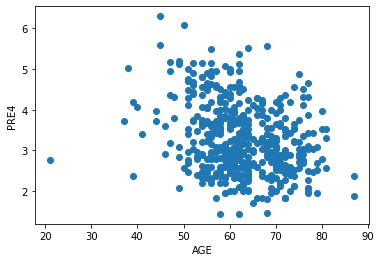

In [127]:
plt.scatter(df['AGE'],df['PRE4'])
plt.xlabel('AGE')
plt.ylabel('PRE4')
plt.show()

2) AGE에 대한 히스토그램(#1:디폴트, #2:bins 설정(10대, 20대, ..., 90대))

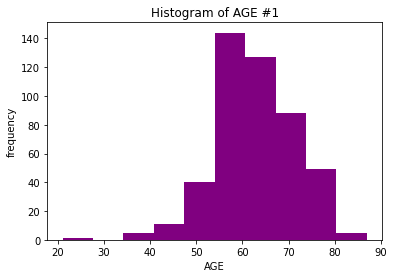

In [128]:
plt.hist(df['AGE'], facecolor='purple')
plt.xlabel('AGE')
plt.ylabel('frequency')
plt.title('Histogram of AGE #1')
plt.show()

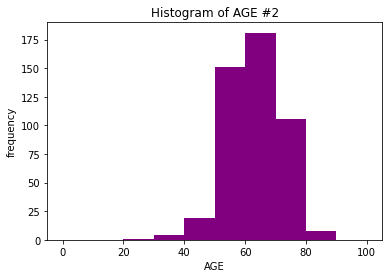

In [129]:
plt.hist(df['AGE'],bins = range(0,101,10), facecolor='purple')
plt.xlabel('AGE')
plt.ylabel('frequency')
plt.title('Histogram of AGE #2')
plt.show()

3) Risk1Yr에 대한 파이차트(pie chart)

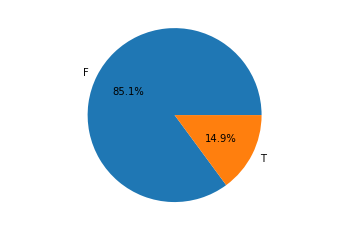

In [130]:
cou = df.groupby('Risk1Yr')['Risk1Yr'].count()
plt.axis('equal')
plt.pie(cou, labels=['F','T'], autopct='%.1f%%')
plt.show()

4) PRE14별 PRE5 평균의 막대그래프(bar chart)

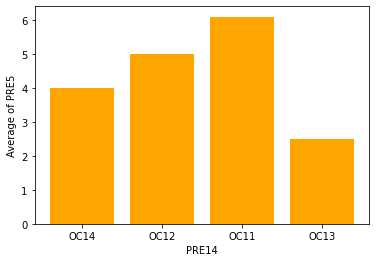

In [131]:
avgs = df.groupby('PRE14')['PRE5'].mean()
index = df['PRE14'].unique()
index2 = ['OC11','OC12','OC13','OC14']
plt.bar(index, avgs, color='orange')
plt.xlabel('PRE14')
plt.ylabel('Average of PRE5')
plt.show()